In [3]:
# MGBD, Mini-batch Gradient Decent
import numpy as np
import matplotlib.pyplot as plt

# load housing data
data = np.loadtxt('USA_Housing.csv', delimiter=',', dtype='str')
header = data[0]
data = data[1:].astype(float)
print('features: ', ', '.join(header[:-1]))
print('labels: ', header[-1])
print('total: ', len(data))

features:  Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms, Avg. Area Number of Bedrooms, Area Population
labels:  Price
total:  5000


In [5]:
# data preparation

# 1. randomize the dataset order
data = np.random.permutation(data)

# 2. standardize the dataset
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(data)
data = ss.transform(data)

# 3. split data into training and testing part
ratio = 0.8
split_index = int(len(data) * ratio)
train, test = data[:split_index, :], data[split_index:, :]

X_train, y_train = train[:, :-1], train[:, -1].flatten()
X_test, y_test = test[:, :-1], test[:, -1].flatten()

print(X_train[:3], y_train[:3])

[[-0.51041798  0.13640126  0.31668214  1.98431323 -0.26056381]
 [ 1.33560586 -0.89754066 -0.14673162 -1.24903785  0.06974078]
 [-0.77659278  0.25747415  0.9664829   0.38789678  0.1588442 ]] [-0.41513785  0.44158301  0.44664152]


coefficience:  [6.51604601e-01 4.64993589e-01 3.46460156e-01 2.82293114e-03
 4.26386301e-01 6.49088316e-05]


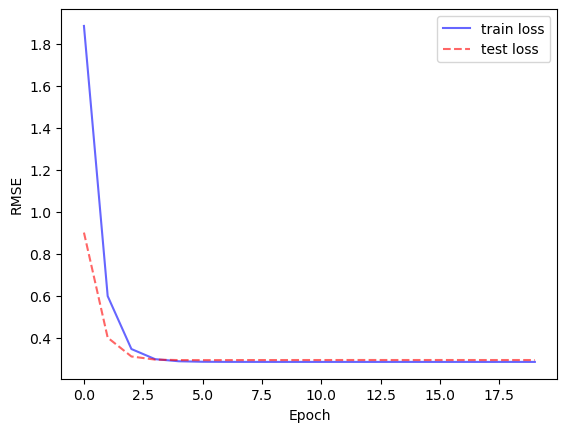

In [8]:
# mini-batch
def batching(X, y, batch_size, shuffle=True):
    # randomize original data
    if shuffle:
        idx = np.random.permutation(len(X))
        X = X[idx]
        y = y[idx]
    
    # generate batches
    batch_count = 0
    while True:
        idx_start = batch_count * batch_size
        idx_end = min(idx_start + batch_size, len(X))
        if idx_start >= idx_end:
            break
        batch_count += 1
        yield X[idx_start:idx_end], y[idx_start:idx_end]

def loss(y_hat, y):
    return np.square(y_hat - y).sum()

def MBGD(n_epoch, learning_rate, batch_size):
    X = np.concatenate([X_train, np.ones((len(X_train), 1))], axis=-1)
    x_test = np.concatenate([X_test, np.ones((len(X_test), 1))], axis=-1)
    theta = np.random.normal(size=X.shape[1])

    train_losses = []
    test_losses = []
    for i in range(n_epoch):
        batches = batching(X, y_train, batch_size, shuffle=True)
        train_loss = 0
        for X_batch, y_batch in batches:
            grad = X_batch.T @ (X_batch @ theta - y_batch)
            theta = theta - learning_rate * grad / len(X_batch)
            train_loss += loss(X_batch @ theta, y_batch)
        train_loss = np.sqrt(train_loss / len(X))
        train_losses.append(train_loss)
        test_loss = np.sqrt(loss(x_test @ theta, y_test) / len(x_test))  # for test data, we do not need batching, 
        test_losses.append(test_loss)                                    # so we calculate loss on whole set
    
    print('coefficient: ', theta)
    return theta, train_losses, test_losses

n_epochs = 20
learning_rate = 0.01
batch_size = 32
np.random.seed(0)

# fitting
_, train_losses, test_losses = MBGD(n_epochs, learning_rate, batch_size)

# visualization
plt.plot(np.arange(n_epochs), train_losses, 
         color='blue', label='train loss', alpha=0.6)
plt.plot(np.arange(n_epochs), test_losses, 
         color='red', linestyle='--', label='test loss', alpha=0.6)
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()